In [1]:
import sys
import os
import pandas as pd

In [2]:
BASE_PATH = "/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying"
sys.path.append(BASE_PATH)
os.chdir(BASE_PATH)

# Imports

In [3]:
from scripts.config import TRAIN_SET_PATH, TEXT_COLUMN, LABEL_COLUMN, BINARY_LABEL_COLUMN, PROCESSED_DATA_PATH, W2V_PATH, MULTI_LABEL_COLUMN
from scripts.data_loader import DataLoader
from scripts.data_understanding import DataUnderstanding
from scripts.data_cleaning import DataCleaner
from scripts.data_balancing import DataBalancer
from scripts.data_embedding import SemanticSimilarity
from scripts.data_saver import DataSaver

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manuelemessere/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/manuelemessere/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manuelemessere/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/envs/ML/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-13 19:03:15.523605: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate co

# Training data loading

In [4]:
loader = DataLoader(file_path=TRAIN_SET_PATH)
train_df = loader.load_dataset()

Dataset loaded with shape: (26698, 6)


# Training data understanding

## Raw column

In [5]:
du_raw = DataUnderstanding(
    dataset=train_df,
    text_column='tweet_text',          
    class_column=LABEL_COLUMN        
)

In [6]:
du_raw.class_distribution()

print("--------------------------")

du_raw.check_imbalance()

print("--------------------------")

du_raw.check_missing_values()

print("--------------------------")

du_raw.check_empty_strings()

print("--------------------------")

du_raw.check_duplicates()

print("--------------------------")

du_raw.inspect_duplicates(text_column='tweet_text', label_column=LABEL_COLUMN)

print("--------------------------")

du_raw.average_tweet_length()

print("--------------------------")

du_raw.binary_class_distribution()

print("--------------------------")



Class Distribution:
cyberbullying_type
religion             5647
age                  5609
ethnicity            5387
gender               5374
not_cyberbullying    4681
Name: count, dtype: int64
--------------------------

Class Imbalance Ratio (max/min): 1.21
--------------------------

Missing Values:
tweet_text              0
cyberbullying_type      0
tweet_soft             19
tweet_full             38
is_cyberbullying        0
cyberbullying_label     0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
dtype: int64
--------------------------

Number of duplicated tweet_text: 0
--------------------------

Total duplicated texts (same text, any label): 0 rows

Label counts among all duplicates:

Perfect duplicates (same text and same label): 0 rows
Imperfect duplicates (same text, different labels): 0

/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_understanding.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, str) and x.strip() == '')



Average Tweet Length: 151.55 characters
Average Tweet Length: 26.58 words
--------------------------

Binary Class Distribution:
is_cyberbullying
Yes    0.824669
No     0.175331
Name: proportion, dtype: float64
--------------------------


## Soft column

In [7]:
du_soft = DataUnderstanding(
    dataset=train_df,
    text_column='tweet_soft',          
    class_column=LABEL_COLUMN        
)

In [8]:
du_soft.class_distribution()

print("--------------------------")

du_soft.check_imbalance()

print("--------------------------")

du_soft.check_missing_values()

print("--------------------------")

du_soft.check_empty_strings()

print("--------------------------")

du_soft.check_duplicates()

print("--------------------------")

du_soft.inspect_duplicates(text_column='tweet_soft', label_column=LABEL_COLUMN)

print("--------------------------")

du_soft.average_tweet_length()

print("--------------------------")

du_soft.binary_class_distribution()

print("--------------------------")



Class Distribution:
cyberbullying_type
religion             5647
age                  5609
ethnicity            5387
gender               5374
not_cyberbullying    4681
Name: count, dtype: int64
--------------------------

Class Imbalance Ratio (max/min): 1.21
--------------------------

Missing Values:
tweet_text              0
cyberbullying_type      0
tweet_soft             19
tweet_full             38
is_cyberbullying        0
cyberbullying_label     0
char_length             0
word_length             0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Number of duplicated tweet_soft: 160
--------------------------

Total duplicated texts (same text, any label): 227 rows

Label counts among all duplicates:
ge

/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_understanding.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, str) and x.strip() == '')


## Full column

In [9]:
du_full = DataUnderstanding(
    dataset=train_df,
    text_column='tweet_full',          
    class_column=LABEL_COLUMN        
)

In [10]:
du_full.class_distribution()

print("--------------------------")

du_full.check_imbalance()

print("--------------------------")

du_full.check_missing_values()

print("--------------------------")

du_full.check_empty_strings()

print("--------------------------")

du_full.check_duplicates()

print("--------------------------")

du_full.inspect_duplicates(text_column='tweet_full', label_column=LABEL_COLUMN)

print("--------------------------")

du_full.average_tweet_length()

print("--------------------------")

du_full.binary_class_distribution()

print("--------------------------")



Class Distribution:
cyberbullying_type
religion             5647
age                  5609
ethnicity            5387
gender               5374
not_cyberbullying    4681
Name: count, dtype: int64
--------------------------

Class Imbalance Ratio (max/min): 1.21
--------------------------

Missing Values:
tweet_text              0
cyberbullying_type      0
tweet_soft             19
tweet_full             38
is_cyberbullying        0
cyberbullying_label     0
char_length             0
word_length             0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Number of duplicated tweet_full: 364
--------------------------

Total duplicated texts (same text, any label): 508 rows

Label counts among all duplicates:
ge

/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_understanding.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, str) and x.strip() == '')


# Data preprocessing

In [11]:
# Text columns to be cleaned
text_columns = ['tweet_text', 'tweet_soft', 'tweet_full']

cleaner = DataCleaner(train_df, text_column=text_columns, label_column=LABEL_COLUMN)

# 1. Remove global duplicates across all specified text columns
cleaned_df = cleaner.clean_text_duplicates()

# 2. Drop rows with missing values in any of the specified text columns
cleaned_df = cleaner.drop_missing_values(important_columns=text_columns)


--- CLEANING DUPLICATES COLUMN BY COLUMN: ['tweet_text', 'tweet_soft', 'tweet_full'] ---

Processing column: 'tweet_text'
 - Removed 0 imperfect duplicates (conflicting labels)
 - Removed 0 perfect duplicates (keeping one)

Processing column: 'tweet_soft'
 - Removed 2 imperfect duplicates (conflicting labels)
 - Removed 158 perfect duplicates (keeping one)

Processing column: 'tweet_full'


/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_cleaning.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates_imperfect = duplicates_all[
/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_cleaning.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates_imperfect = duplicates_all[
/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_cleaning.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates_imperfect = duplicates_all[


 - Removed 13 imperfect duplicates (conflicting labels)
 - Removed 355 perfect duplicates (keeping one)

Total rows removed: 368
--- DUPLICATE CLEANING COMPLETED ---

--- DROPPING MISSING VALUES IN: ['tweet_text', 'tweet_soft', 'tweet_full'] ---
Removed 2 rows with missing values.

MISSING VALUE CLEANING COMPLETED.


In [12]:
# Check
print(f"Remaining rows: {cleaned_df.shape[0]}")


Remaining rows: 26328


# Preprocessed training data understanding

## Raw column

In [13]:
cleaned_du = DataUnderstanding(
    dataset=cleaned_df,
    text_column='tweet_text',          
    class_column=LABEL_COLUMN        
)

In [14]:
cleaned_du.class_distribution()

print("--------------------------")

cleaned_du.check_imbalance()

print("--------------------------")

cleaned_du.check_missing_values()

print("--------------------------")

cleaned_du.check_empty_strings()

print("--------------------------")

cleaned_du.check_empty_strings()

print("--------------------------")

cleaned_du.check_duplicates()

print("--------------------------")

cleaned_du.inspect_duplicates(text_column='tweet_text', label_column='cyberbullying_type')

print("--------------------------")

cleaned_du.binary_class_distribution()


Class Distribution:
cyberbullying_type
religion             5619
age                  5531
ethnicity            5313
gender               5253
not_cyberbullying    4612
Name: count, dtype: int64
--------------------------

Class Imbalance Ratio (max/min): 1.22
--------------------------

Missing Values:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying      

/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_understanding.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, str) and x.strip() == '')


## Soft column

In [15]:
cleaned_du = DataUnderstanding(
    dataset=cleaned_df,
    text_column='tweet_soft',          
    class_column=LABEL_COLUMN        
)

In [16]:
cleaned_du.class_distribution()

print("--------------------------")

cleaned_du.check_imbalance()

print("--------------------------")

cleaned_du.check_missing_values()

print("--------------------------")

cleaned_du.check_empty_strings()

print("--------------------------")

cleaned_du.check_empty_strings()

print("--------------------------")

cleaned_du.check_duplicates()

print("--------------------------")

cleaned_du.inspect_duplicates(text_column='tweet_soft', label_column='cyberbullying_type')

print("--------------------------")

cleaned_du.binary_class_distribution()


Class Distribution:
cyberbullying_type
religion             5619
age                  5531
ethnicity            5313
gender               5253
not_cyberbullying    4612
Name: count, dtype: int64
--------------------------

Class Imbalance Ratio (max/min): 1.22
--------------------------

Missing Values:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying      

/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_understanding.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, str) and x.strip() == '')


## Full column

In [17]:
cleaned_du = DataUnderstanding(
    dataset=cleaned_df,
    text_column='tweet_full',          
    class_column=LABEL_COLUMN        
)

In [18]:
cleaned_du.class_distribution()

print("--------------------------")

cleaned_du.check_imbalance()

print("--------------------------")

cleaned_du.check_missing_values()

print("--------------------------")

cleaned_du.check_empty_strings()

print("--------------------------")

cleaned_du.check_empty_strings()

print("--------------------------")

cleaned_du.check_duplicates()

print("--------------------------")

cleaned_du.inspect_duplicates(text_column='tweet_full', label_column='cyberbullying_type')

print("--------------------------")

cleaned_du.binary_class_distribution()


Class Distribution:
cyberbullying_type
religion             5619
age                  5531
ethnicity            5313
gender               5253
not_cyberbullying    4612
Name: count, dtype: int64
--------------------------

Class Imbalance Ratio (max/min): 1.22
--------------------------

Missing Values:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying       0
cyberbullying_label    0
char_length            0
word_length            0
dtype: int64
--------------------------

Empty or whitespace-only strings per column:
tweet_text             0
cyberbullying_type     0
tweet_soft             0
tweet_full             0
is_cyberbullying      

/Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/scripts/data_understanding.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, str) and x.strip() == '')



Perfect duplicates (same text and same label): 0 rows
Imperfect duplicates (same text, different labels): 2 rows
--------------------------

Binary Class Distribution:
is_cyberbullying
Yes    0.824825
No     0.175175
Name: proportion, dtype: float64


# Data balancing

## Versione ultima multi 

In [ ]:
import os
import numpy as np
import pandas as pd
from scripts.text_preprocessing import TextPreprocessor
from scripts.data_balancing import DataBalancer
from scripts.data_embedding import SemanticSimilarity
from scripts.data_saver import DataSaver

In [ ]:
# === Parametri ===
TEXT_COLUMN = 'tweet_text'
LABEL_COLUMN = 'cyberbullying_label'
TARGET_SIZE = 5700  # oppure max(train_df[LABEL_COLUMN].value_counts())

In [ ]:
# === Inizializzazione componenti ===
preprocessor = TextPreprocessor()
balancer = DataBalancer(target_size=TARGET_SIZE)
sim_model = SemanticSimilarity()
saver = DataSaver()

In [ ]:
# === Preprocessing iniziale ===
cleaned_df['sample_id'] = range(len(cleaned_df))
cleaned_df['tweet_raw'] = cleaned_df[TEXT_COLUMN].astype(str)

In [ ]:
# === Bilanciamento per ogni classe ===
balanced_dfs = []
accepted_augmented_dfs = []

for label in cleaned_df[MULTI_LABEL_COLUMN].unique():
    print(f"--- Balancing class {label} ---")

    # Bilanciare la singola classe
    df_balanced = balancer.balance(
        cleaned_df,
        text_column=TEXT_COLUMN,
        label_column=MULTI_LABEL_COLUMN,
        minority_label=label
    )

    # Isolare gli esempi originali e gli aumentati
    original = cleaned_df[cleaned_df[MULTI_LABEL_COLUMN] == label][TEXT_COLUMN].reset_index(drop=True)
    augmented_all = df_balanced[df_balanced[MULTI_LABEL_COLUMN] == label][TEXT_COLUMN].reset_index(drop=True)
    augmented_only = augmented_all[~augmented_all.isin(original)].reset_index(drop=True)

    # Ripetizione per confronto semantico
    original_repeated = pd.Series(np.resize(original.values, len(augmented_only)))

    # Calcolo similarità semantica
    similarity_results = sim_model.predict_class(
        df_source=pd.DataFrame({TEXT_COLUMN: augmented_only}),
        df_target=pd.DataFrame({TEXT_COLUMN: original_repeated, 'target': ['original'] * len(original_repeated)}),
        source_text_col=TEXT_COLUMN,
        target_text_col=TEXT_COLUMN,
        target_class_col='target',
        threshold=0.7
    )

    # Filtrare esempi accettabili
    accepted = similarity_results[similarity_results['similarity_score'] >= 0.85]
    print(f" -> Accepted augmented for class {label}: {len(accepted)}")

    # Preprocessing testi augmentati accettati
    df_augmented = pd.DataFrame({
        TEXT_COLUMN: accepted[TEXT_COLUMN],
        MULTI_LABEL_COLUMN: label
    })
    # Recupera categoria testuale
    label_to_category = dict(zip(cleaned_df[MULTI_LABEL_COLUMN], cleaned_df['cyberbullying_type']))
    category_name = label_to_category[label] if label in label_to_category else "unknown"
    df_augmented['cyberbullying_type'] = category_name

    df_augmented['tweet_soft'] = df_augmented[TEXT_COLUMN].apply(preprocessor.clean_text_soft)
    df_augmented['tweet_full'] = df_augmented[TEXT_COLUMN].apply(preprocessor.clean_text_full)
    df_augmented['sample_id'] = range(
        cleaned_df['sample_id'].max() + 1,
        cleaned_df['sample_id'].max() + 1 + len(df_augmented)
    )

    accepted_augmented_dfs.append(df_augmented)

In [ ]:
# === Preparare dataset originale ===
df_original = cleaned_df[['tweet_text', 'tweet_soft', 'tweet_full', MULTI_LABEL_COLUMN, 'cyberbullying_type', 'sample_id']].copy()
df_original.rename(columns={MULTI_LABEL_COLUMN: 'label'}, inplace=True)

# === Unire augmentati ===
df_augmented_all = pd.concat(accepted_augmented_dfs, ignore_index=True)
df_augmented_all.rename(columns={MULTI_LABEL_COLUMN: 'label'}, inplace=True)
df_augmented_all = df_augmented_all[['tweet_text', 'tweet_soft', 'tweet_full', 'label', 'cyberbullying_type', 'sample_id']]


# === Combinare, mescolare e salvare ===
df_combined = pd.concat([df_original, df_augmented_all]).sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# === Salvataggio ===
output_path = os.path.join(PROCESSED_DATA_PATH, "train_multiclass_balanced.csv")
saver.save_full_dataset(df_combined, output_path)

print(f"\nDataset bilanciato salvato in: {output_path}")
print(f"Totale esempi: {len(df_combined)}")
print(df_combined['label'].value_counts())


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manuelemessere/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


--- Balancing class 4 ---


Batches: 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]


 -> Accepted augmented for class 4: 74
--- Balancing class 0 ---


Batches: 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]


 -> Accepted augmented for class 0: 149
--- Balancing class 3 ---


Batches: 100%|██████████| 32/32 [00:13<00:00,  2.39it/s]


 -> Accepted augmented for class 3: 869
--- Balancing class 1 ---


Batches: 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]


 -> Accepted augmented for class 1: 340
--- Balancing class 2 ---


Batches: 100%|██████████| 14/14 [00:12<00:00,  1.14it/s]


 -> Accepted augmented for class 2: 373
Dataset saved to /Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/data/processed_data/train_multiclass_balanced.csv.

Dataset bilanciato salvato in: /Users/manuelemessere/Documents/Università /a) corsi/Human Language Technologies/HLT24_25/hlt_projct/cyberbullying/data/processed_data/train_multiclass_balanced.csv
Totale esempi: 28133
label
4    5693
0    5680
1    5653
2    5626
3    5481
Name: count, dtype: int64


Batches: 100%|██████████| 57/57 [00:26<00:00,  2.13it/s]


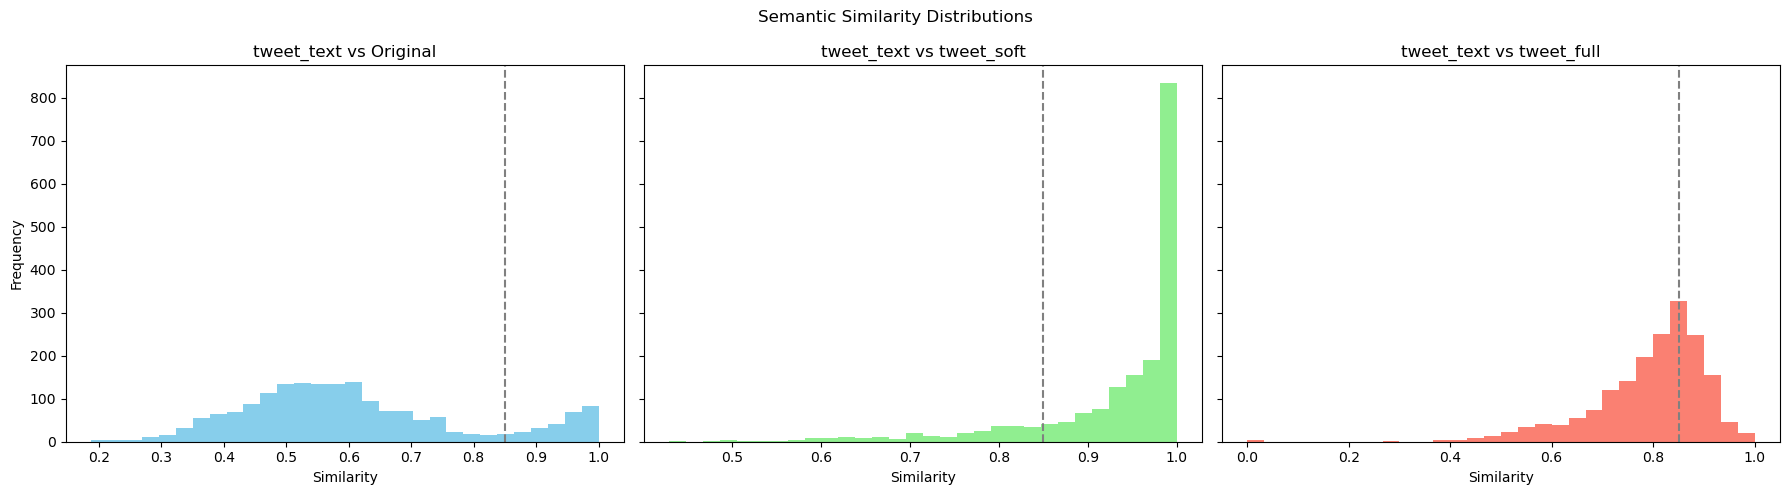

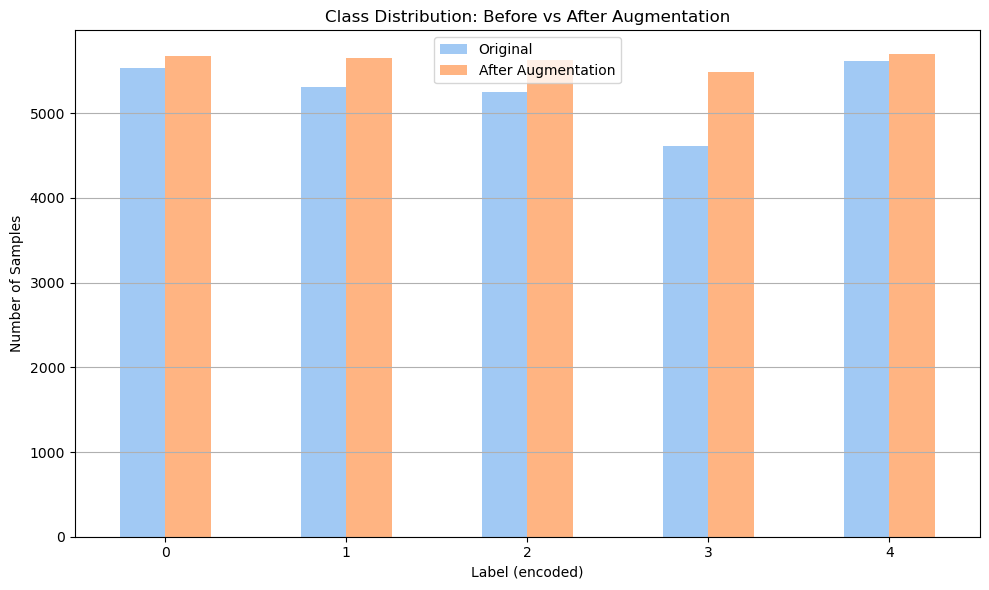

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scripts.data_embedding import SemanticSimilarity
from scripts.data_saver import DataSaver

# --- Constants ---
SIMILARITY_THRESHOLD = 0.85
FILENAME = "train_multiclass_balanced.csv"

# --- 1. Estrai sample originali e augmentati ---

# Augmented = sample_id > massimo sample_id originale
aug_start_id = cleaned_df['sample_id'].max() + 1
df_aug = df_combined[df_combined['sample_id'] >= aug_start_id].reset_index(drop=True)
df_ori = df_combined[df_combined['sample_id'] < aug_start_id].copy()

# --- 2. Analisi similarità semantica vs originali per ogni classe ---

sim_model = SemanticSimilarity()
similarity_text_original_all = []

for label in df_aug['label'].unique():
    # Estrai augmented e originali della stessa classe
    aug_class = df_aug[df_aug['label'] == label].reset_index(drop=True)
    ori_class = df_ori[df_ori['label'] == label].reset_index(drop=True)

    # Ripeti gli originali per confronto uno-a-uno
    ori_repeated = pd.Series(np.resize(ori_class[TEXT_COLUMN].values, len(aug_class)))

    # Calcola similarità semantica
    df_source = aug_class[[TEXT_COLUMN]].copy()
    df_target = pd.DataFrame({TEXT_COLUMN: ori_repeated, 'target': ['original'] * len(ori_repeated)})

    sim_results = sim_model.predict_class(
        df_source=df_source,
        df_target=df_target,
        source_text_col=TEXT_COLUMN,
        target_text_col=TEXT_COLUMN,
        target_class_col='target',
        threshold=0.0
    )
    sim_results['class'] = label
    similarity_text_original_all.append(sim_results)

similarity_text_original = pd.concat(similarity_text_original_all, ignore_index=True)

# --- 3. Similarità con versioni preprocessate ---

# tweet_soft
df_target_soft = pd.DataFrame({
    TEXT_COLUMN: df_aug['tweet_soft'],
    'target': ['soft'] * len(df_aug)
})
similarity_text_soft = sim_model.predict_class(
    df_source=df_aug[[TEXT_COLUMN]],
    df_target=df_target_soft,
    source_text_col=TEXT_COLUMN,
    target_text_col=TEXT_COLUMN,
    target_class_col='target',
    threshold=0.0
)

# tweet_full (Word2Vec)
sim_model_full = SemanticSimilarity(model_type="word2vec", model_path=W2V_PATH)
df_target_full = pd.DataFrame({
    TEXT_COLUMN: df_aug['tweet_full'],
    'target': ['full'] * len(df_aug)
})
similarity_text_full = sim_model_full.predict_class(
    df_source=df_aug[[TEXT_COLUMN]],
    df_target=df_target_full,
    source_text_col=TEXT_COLUMN,
    target_text_col=TEXT_COLUMN,
    target_class_col='target',
    threshold=0.0
)

# --- 4. Istogrammi similarità ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# tweet_text vs original
axs[0].hist(similarity_text_original['similarity_score'], bins=30, color='skyblue')
axs[0].axvline(SIMILARITY_THRESHOLD, color='gray', linestyle='--', label=f'Threshold {SIMILARITY_THRESHOLD}')
axs[0].set_title('tweet_text vs Original')
axs[0].set_xlabel('Similarity')
axs[0].set_ylabel('Frequency')

# tweet_text vs tweet_soft
axs[1].hist(similarity_text_soft['similarity_score'], bins=30, color='lightgreen')
axs[1].axvline(SIMILARITY_THRESHOLD, color='gray', linestyle='--')
axs[1].set_title('tweet_text vs tweet_soft')
axs[1].set_xlabel('Similarity')

# tweet_text vs tweet_full
axs[2].hist(similarity_text_full['similarity_score'], bins=30, color='salmon')
axs[2].axvline(SIMILARITY_THRESHOLD, color='gray', linestyle='--')
axs[2].set_title('tweet_text vs tweet_full')
axs[2].set_xlabel('Similarity')

plt.suptitle('Semantic Similarity Distributions')
plt.tight_layout()
plt.show()

# --- 5. Distribuzione classi: prima vs dopo augmentation ---

original_counts = cleaned_df[MULTI_LABEL_COLUMN].value_counts().sort_index()
augmented_counts = df_combined['label'].value_counts().sort_index()

df_class_distribution = pd.DataFrame({
    'Original': original_counts,
    'After Augmentation': augmented_counts
})

df_class_distribution.plot(kind='bar', figsize=(10, 6), color=['#a1c9f4', '#ffb482'])

plt.title("Class Distribution: Before vs After Augmentation")
plt.xlabel("Label (encoded)")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
